## Necessary pre processing of data before application of models



In [34]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

1 a. Reading data from the provided file into a dataframe

In [35]:
import pandas as pd 
df_cumulative = pd.read_csv("cumulative.csv", on_bad_lines='skip',delimiter=',')
df_cumulative 

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [36]:
df_cumulative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

Depiction of value count to show the bias within the data for column 'koi_tce_delivname'

In [37]:
df_cumulative['koi_tce_delivname'].value_counts()

q1_q17_dr25_tce    8054
q1_q16_tce          796
q1_q17_dr24_tce     368
Name: koi_tce_delivname, dtype: int64

Depiction of value count to show the bias within the data for column 'koi_insol'

In [38]:
df_cumulative['koi_insol'].value_counts() #Shows that the column is 

1.28      11
0.35      11
0.58      10
0.52      10
0.80       9
          ..
152.86     1
209.11     1
10.44      1
283.28     1
607.42     1
Name: koi_insol, Length: 7801, dtype: int64

Histogram for the target column 'koi_dispostion'

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='koi_disposition', ylabel='count'>

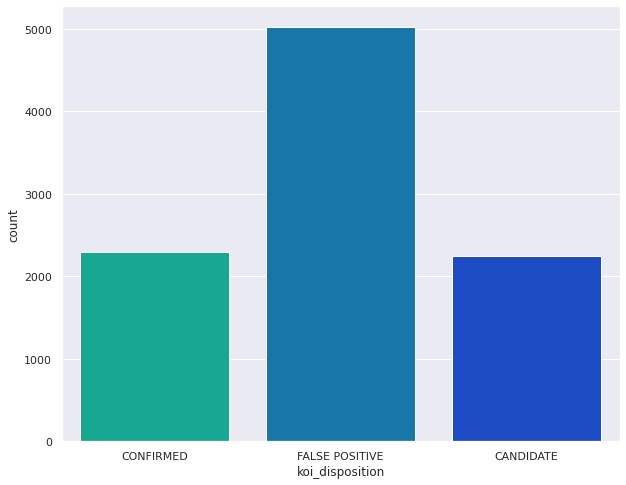

In [39]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(df_cumulative['koi_disposition'],palette='winter_r')

**Dropping columns based on bias and correlation analysis**

In [40]:
df_cumulative.drop(columns=['koi_teq_err1','koi_teq_err2','kepler_name','koi_tce_delivname','rowid'],inplace=True)

In [41]:
df_cumulative.drop(columns=['kepid'],inplace=True)

In [42]:
df_cumulative.drop(columns=['koi_time0bk_err1','koi_impact_err2','koi_time0bk','koi_time0bk_err2','koi_insol'], inplace=True)

In [43]:
df_cumulative.drop(columns=['kepoi_name'], inplace=True)

# Correlation Analysis


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


corr = df_cumulative.corr()
corr.style.background_gradient(cmap='YlOrRd')

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_impact,koi_impact_err1,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
koi_score,1.000000,-0.349837,-0.582210,-0.521103,-0.398251,-0.070669,-0.093077,0.093077,-0.214340,-0.121752,-0.173200,-0.095304,0.095304,-0.301010,-0.166398,0.166398,-0.076870,-0.054581,0.049689,-0.302279,-0.043238,0.026134,-0.269034,0.209081,-0.192544,-0.372432,0.333595,0.150017,-0.164267,0.228382,-0.071767,-0.117010,0.075529,-0.168666,0.094944,0.042112
koi_fpflag_nt,-0.349837,1.000000,-0.253562,-0.020810,0.027112,0.032428,0.358862,-0.358862,0.056062,-0.022399,0.259361,0.370354,-0.370354,-0.045873,0.027879,-0.027879,0.045008,0.048595,-0.041881,-0.021832,0.023554,-0.004896,-0.080243,0.031631,0.107827,0.138399,-0.155697,-0.120439,0.063078,-0.171242,0.034619,0.087934,-0.043843,0.006800,-0.038695,-0.103803
koi_fpflag_ss,-0.582210,-0.253562,1.000000,0.149733,0.100001,-0.020984,-0.134983,0.134983,0.043204,0.146152,0.003639,-0.193946,0.193946,0.424323,0.007952,-0.007952,0.001429,0.006198,0.001770,0.188517,0.022201,-0.019643,0.431023,-0.181990,0.103838,0.204430,-0.172346,-0.049751,0.114855,-0.044848,0.031932,0.036423,-0.031198,0.085946,-0.047653,0.020890
koi_fpflag_co,-0.521103,-0.020810,0.149733,1.000000,0.525684,-0.020441,-0.088841,0.088841,0.011166,0.108294,-0.045537,-0.013527,0.013527,-0.124987,-0.010466,0.010466,-0.011491,-0.015183,0.011606,0.253654,0.019153,-0.014563,-0.128351,-0.122472,0.017077,0.145679,-0.111144,-0.010835,-0.016324,-0.046994,0.036803,0.029254,-0.028215,0.156078,-0.098131,0.064337
koi_fpflag_ec,-0.398251,0.027112,0.100001,0.525684,1.000000,-0.017021,-0.082244,0.082244,-0.005014,0.034619,0.018939,0.016910,-0.016910,-0.087280,-0.003689,0.003689,-0.010148,-0.012598,0.008866,0.217418,0.038885,-0.024718,-0.089897,-0.095758,0.011224,0.111690,-0.077628,0.002190,-0.005519,-0.036241,0.019274,0.026714,-0.010055,0.070002,-0.045339,0.038450
koi_period,-0.070669,0.032428,-0.020984,-0.020441,-0.017021,1.000000,0.053172,-0.053172,0.004928,-0.001884,0.037302,0.032922,-0.032922,-0.009180,0.002662,-0.002662,0.005135,0.003442,-0.004966,-0.049097,-0.003642,0.002448,-0.009614,-0.015107,-0.013552,0.005325,0.003194,0.001877,-0.006466,-0.003180,-0.000993,-0.000435,0.001556,0.005670,0.011479,-0.009858
koi_period_err1,-0.093077,0.358862,-0.134983,-0.088841,-0.082244,0.053172,1.000000,-1.000000,0.024999,-0.014071,0.272808,0.543492,-0.543492,-0.071086,0.007794,-0.007794,0.023356,0.017057,-0.022560,-0.233183,-0.016898,0.011018,-0.081315,0.017696,0.034981,0.080781,-0.059013,-0.006311,0.005143,-0.186678,0.005900,0.032554,-0.002373,-0.032095,0.009384,-0.025989
koi_period_err2,0.093077,-0.358862,0.134983,0.088841,0.082244,-0.053172,-1.000000,1.000000,-0.024999,0.014071,-0.272808,-0.543492,0.543492,0.071086,-0.007794,0.007794,-0.023356,-0.017057,0.022560,0.233183,0.016898,-0.011018,0.081315,-0.017696,-0.034981,-0.080781,0.059013,0.006311,-0.005143,0.186678,-0.005900,-0.032554,0.002373,0.032095,-0.009384,0.025989
koi_impact,-0.214340,0.056062,0.043204,0.011166,-0.005014,0.004928,0.024999,-0.024999,1.000000,0.135050,0.036955,0.029864,-0.029864,0.005595,0.003753,-0.003753,0.677380,0.764919,-0.606893,-0.009982,-0.002757,0.003037,-0.000476,-0.008040,0.016070,0.025403,-0.039143,-0.059275,0.010622,0.000479,0.022645,0.021761,-0.029131,0.022464,-0.001804,-0.009796
koi_impact_err1,-0.121752,-0.022399,0.146152,0.108294,0.034619,-0.001884,-0.014071,0.014071,0.135050,1.000000,-0.004081,-0.005862,0.005862,-0.040054,0.003104,-0.003104,0.027605,0.044885,-0.019250,-0.060290,-0.009034,0.006390,-0.051842,-0.017091,-0.008268,0.047260,-0.036202,0.006990,0.007949,-0.008021,0.005847,0.003378,-0.006546,0.0258

**Checking correlation analysis with the target**

In [49]:
df_cumulative.corr()['koi_disposition']

koi_disposition      1.000000
koi_pdisposition     0.905133
koi_score           -0.845784
koi_fpflag_nt        0.408856
koi_fpflag_ss        0.446835
koi_fpflag_co        0.422841
koi_fpflag_ec        0.318463
koi_period          -0.012878
koi_period_err1      0.066239
koi_period_err2     -0.066239
koi_impact           0.062114
koi_impact_err1      0.077778
koi_duration         0.129332
koi_duration_err1    0.040919
koi_duration_err2   -0.040919
koi_depth            0.237686
koi_depth_err1       0.019395
koi_depth_err2      -0.019395
koi_prad             0.026194
koi_prad_err1        0.031551
koi_prad_err2       -0.022360
koi_teq              0.224259
koi_insol_err1       0.035096
koi_insol_err2      -0.017622
koi_model_snr        0.221245
koi_tce_plnt_num    -0.138648
koi_steff            0.135755
koi_steff_err1       0.243708
koi_steff_err2      -0.228649
koi_slogg           -0.099025
koi_slogg_err1       0.097563
koi_slogg_err2      -0.122731
koi_srad             0.048100
koi_srad_e

## Label Encoding done for koi_disposition and koi_pdisposition, changing strings into categorical data

In [46]:
#label encoding koi disposition
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_cumulative['koi_disposition'] = le.fit_transform(df_cumulative['koi_disposition'])
label_map = dict(zip(df_cumulative['koi_disposition'], le.fit_transform(df_cumulative['koi_disposition'])))
print(label_map) # get the mapping between the original labels and encoded labels
# df_cumulative

{1: 1, 2: 2, 0: 0}


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='koi_disposition', ylabel='count'>

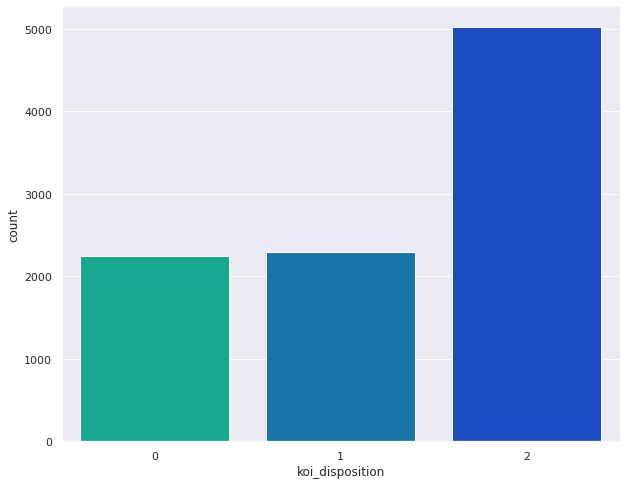

In [47]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(df_cumulative['koi_disposition'],palette='winter_r')

In [48]:
#label encoding koi pdisposition
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_cumulative['koi_pdisposition'] = le.fit_transform(df_cumulative[['koi_pdisposition']])
label_map = dict(zip(df_cumulative['koi_pdisposition'], le.fit_transform(df_cumulative['koi_pdisposition']))) # get the mapping between the original labels and encoded labels
# df_cumulative

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Feature Sets

Placing correlation analysis into a new data frame

In [50]:
df_new = df_cumulative.corr()['koi_disposition'] 

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

df_new = df_new.to_frame()


In [52]:
df_new = df_new.abs()

In [53]:
df_new = df_new.drop(index=df_new.index[0], axis=0, errors='raise')

In [54]:
df_cumulative['koi_score'].isna().sum()

1510

In [55]:
df_new

,koi_disposition
koi_pdisposition,0.905133
koi_score,0.845784
koi_fpflag_nt,0.408856
koi_fpflag_ss,0.446835
koi_fpflag_co,0.422841
koi_fpflag_ec,0.318463
koi_period,0.012878
koi_period_err1,0.066239
koi_period_err2,0.066239
koi_impact,0.062114


## Scaling

In [56]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = df_cumulative
df_scaled = df_scaled.drop(['koi_disposition'], axis = 1)

df_scaler = pd.DataFrame(scaler.fit_transform(df_scaled.values), columns=df_scaled.columns, index=df_scaled.index)
df_scaler

,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_impact,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0.0,1.000,0.0,0.0,0.0,0.0,0.000071,1.608696e-04,0.999839,0.001448,...,0.954030,0.831296,0.043478,0.920464,0.003560,0.003173,0.999475,0.552473,0.733837,0.642863
1,0.0,0.969,0.0,0.0,0.0,0.0,0.000417,1.437101e-03,0.998563,0.005813,...,0.954030,0.831296,0.043478,0.920464,0.003560,0.003173,0.999475,0.552473,0.733837,0.642863
2,1.0,0.000,0.0,1.0,0.0,0.0,0.000151,8.660870e-05,0.999913,0.009613,...,0.900114,0.845778,0.029891,0.854184,0.003303,0.007041,0.999328,0.784346,0.733360,0.649689
3,1.0,0.000,0.0,1.0,0.0,0.0,0.000012,1.524638e-06,0.999998,0.012658,...,0.901249,0.849539,0.036005,0.860812,0.002968,0.006074,0.999423,0.259826,0.742947,0.662039
4,0.0,1.000,0.0,0.0,0.0,0.0,0.000018,2.180290e-05,0.999978,0.006954,...,0.880250,0.825842,0.047554,0.826015,0.004077,0.010093,0.998855,0.407085,0.739203,0.655289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,1.0,0.000,0.0,0.0,0.0,1.0,0.000064,1.070145e-03,0.998930,0.007589,...,0.913734,0.799135,0.156929,0.843413,0.004260,0.009459,0.998037,0.864114,0.659700,0.576206
9560,1.0,0.000,0.0,1.0,1.0,0.0,0.000002,6.724638e-07,0.999999,0.012420,...,0.905789,0.842957,0.023777,0.837614,0.003455,0.007162,0.999320,0.792756,0.667345,0.545831
9561,0.0,0.497,0.0,0.0,0.0,0.0,0.000012,1.031884e-04,0.999897,0.000427,...,0.875142,0.826970,0.038043,0.814416,0.004012,0.010305,0.999018,0.304401,0.671749,0.597607
9562,1.0,0.021,0.0,0.0,1.0,0.0,0.000003,1.411014e-05,0.999986,0.001458,...,0.866061,0.827534,0.038043,0.814416,0.004056,0.010305,0.999018,0.654479,0.672578,0.645777


In [57]:
df_new.sort_values(by=['koi_disposition'],  ascending=False, inplace=True)

## Filling up empty values with mean value for column 'koi_score'

In [58]:
df_scaler['koi_score'].isna().sum()

1510

In [59]:
mean_value = df_scaler['koi_score'].mean()
mean_value

0.4808294015396076

In [60]:
df_cumulative['koi_score'].fillna(value=mean_value, inplace=True)

In [61]:
#koi score null values is filled with mean value of koi_score in the data frame
df_scaler['koi_score'].fillna(value=mean_value, inplace=True)

In [62]:
df_scaler.dropna(inplace=True)

In [63]:
df_cumulative.dropna(inplace = True)

In [64]:
from sklearn.model_selection import train_test_split

## Feature sets based on value from correlation analysis:

In [65]:
#top 10 feature sets, index indicates the index value ie the name of the column 
feature_set_best = list(df_new.head(10).index)

In [66]:
#top 20 feature sets
feature_set_best_20 = list(df_new.head(20).index)

In [67]:
#worst 5 features
feature_worst = list(df_new.tail(5).index)

In [68]:

#all features
features_all = list(df_new.index)

In [69]:
print("Feature set best:", feature_set_best)
print("Feature set top 20:", feature_set_best_20)
print("Feature set worst 5:", feature_worst)
print("Feature set all:", features_all)

Feature set best: ['koi_pdisposition', 'koi_score', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_nt', 'koi_fpflag_ec', 'koi_steff_err1', 'koi_depth', 'koi_steff_err2', 'koi_teq']
Feature set top 20: ['koi_pdisposition', 'koi_score', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_nt', 'koi_fpflag_ec', 'koi_steff_err1', 'koi_depth', 'koi_steff_err2', 'koi_teq', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_duration', 'koi_slogg_err2', 'ra', 'koi_slogg', 'koi_slogg_err1', 'koi_srad_err1', 'koi_impact_err1']
Feature set worst 5: ['koi_prad_err2', 'koi_depth_err2', 'koi_depth_err1', 'koi_insol_err2', 'koi_period']
Feature set all: ['koi_pdisposition', 'koi_score', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_nt', 'koi_fpflag_ec', 'koi_steff_err1', 'koi_depth', 'koi_steff_err2', 'koi_teq', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_duration', 'koi_slogg_err2', 'ra', 'koi_slogg', 'koi_slogg_err1', 'koi_srad_err1', 'koi_impact_err1', 'dec', 'koi_period_err2', 'koi_period_

In [70]:
df_best_10 = df_scaler[feature_set_best]
df_best_20 = df_scaler[feature_set_best_20]
df_all = df_scaler[features_all]
df_worst = df_scaler[feature_worst]


## Task 2 - Train set of classifiers


Random Sampling i.e. increasing the no.of rows

In [71]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
# define dataset

X1 = df_best_10
X2 = df_best_20
X3 = df_all
X4 = df_worst
y = df_cumulative['koi_disposition']
# summarize class distribution
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy={0: 4358 , 1: 4358 , 2: 4358 })
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X1, y)
# summarize class distribution


Trying smote way of oversampling

In [72]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_resampled, y_resampled = sm.fit_resample(X1, y)
X_resampled_20, y_resampled_20 = sm.fit_resample(X2, y)
X_resampled_all, y_resampled_all = sm.fit_resample(X3, y)
X_resampled_worst, y_resampled_worst = sm.fit_resample(X4, y)

In [73]:
from sklearn.model_selection import train_test_split

X_train_SMOTE, X_test_SMOTE, Y_train_SMOTE, Y_test_SMOTE = train_test_split(X_resampled, y_resampled,test_size=0.30)
X_train_SMOTE1, X_test_SMOTE1, Y_train_SMOTE1, Y_test_SMOTE1 = train_test_split(X_resampled_20, y_resampled_20,test_size=0.30)
X_train_SMOTE2, X_test_SMOTE2, Y_train_SMOTE2, Y_test_SMOTE2 = train_test_split(X_resampled_all, y_resampled_all,test_size=0.30)
X_train_SMOTE3, X_test_SMOTE3, Y_train_SMOTE3, Y_test_SMOTE3 = train_test_split(X_resampled_worst, y_resampled_worst,test_size=0.30)


From the above value counts performed on the the Y training data set we notice that there is an imbalance in the data, hence we need to balance our data before proceeding forth with the classifiers.


In [74]:
Y_train_SMOTE.value_counts()

2    3059
0    3049
1    3043
Name: koi_disposition, dtype: int64

SVM after oversampling the the target variable using SMOTE Sampler

In [75]:
#SVM - classfier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


df_modelSVM=pd.DataFrame()
df_SVM=pd.DataFrame()

def SVM(SetName, X_train, Y_train, X_test, Y_test):
  classifier = SVC(kernel='rbf', random_state = 1)
  classifier.fit(X_train,Y_train)
  y_pred = classifier.predict(X_test)
  accuracy = metrics.accuracy_score(Y_test, y_pred)
  #class_report = classification_report(Y_test, y_pred, digits=5, output_dict=True )
  print(classification_report(Y_test, y_pred))
  print(confusion_matrix(Y_test, y_pred))
 
  

# df_SVM=df_SVM.append(SVM('features_best',X_train_new,Y_train_new, X_test, Y_test), ignore_index=True),,     WRONG Naming  
print("TOP 10 FEATURES")
df_SVM = df_SVM.append(SVM('features_top_10',X_train_SMOTE,Y_train_SMOTE, X_test_SMOTE, Y_test_SMOTE), ignore_index=True) #features_top_10

print("------------------------------------------------------------------------------------------")
print("TOP 20 FEATURES")
df_SVM = df_SVM.append(SVM('features_top_20',X_train_SMOTE1,Y_train_SMOTE1, X_test_SMOTE1, Y_test_SMOTE1), ignore_index=True) #features_top_20

print("------------------------------------------------------------------------------------------")
print("ALL FEATURES")
df_SVM = df_SVM.append(SVM('features_all',X_train_SMOTE2,Y_train_SMOTE2, X_test_SMOTE2, Y_test_SMOTE2), ignore_index=True) #features_all

print("------------------------------------------------------------------------------------------")
print("WORST 5 FEATURES")
df_SVM = df_SVM.append(SVM('features_worst',X_train_SMOTE3,Y_train_SMOTE3, X_test_SMOTE3, Y_test_SMOTE3), ignore_index=True) #features_worst

df_SVM

TOP 10 FEATURES
              precision    recall  f1-score   support

           0       0.86      0.45      0.59      1309
           1       0.62      0.91      0.74      1315
           2       0.98      1.00      0.99      1299

    accuracy                           0.79      3923
   macro avg       0.82      0.79      0.78      3923
weighted avg       0.82      0.79      0.77      3923

[[ 589  720    0]
 [  92 1200   23]
 [   0    0 1299]]
------------------------------------------------------------------------------------------
TOP 20 FEATURES
              precision    recall  f1-score   support

           0       0.87      0.44      0.58      1313
           1       0.61      0.92      0.73      1275
           2       0.98      1.00      0.99      1335

    accuracy                           0.78      3923
   macro avg       0.82      0.78      0.77      3923
weighted avg       0.83      0.78      0.77      3923

[[ 572  741    0]
 [  82 1168   25]
 [   0    0 1335]]
-----

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


""


## Random Forest Classifier:

In [76]:
#Random Forest
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

df_modelRF=pd.DataFrame()
df_RF=pd.DataFrame()


def RF(SetName, X_train, Y_train, X_test, Y_test):

  rf=RandomForestClassifier(n_estimators=10)
  rf.fit(X_train,Y_train)
  y_pred=rf.predict(X_test)
  accuracy = metrics.accuracy_score(Y_test, y_pred)
  class_report = classification_report(Y_test, y_pred, digits=5, output_dict=True )
  print(classification_report(Y_test, y_pred))
  print(confusion_matrix(Y_test, y_pred))

In [77]:
#Random Forest
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

df_modelRF=pd.DataFrame()
df_RF=pd.DataFrame()

print("TOP 10 FEATURES")
df_RF = df_RF.append(RF('features_top_10',X_train_SMOTE,Y_train_SMOTE, X_test_SMOTE, Y_test_SMOTE), ignore_index=True) #features_top_10
print("------------------------------------------------------------------------------------------")
print("TOP 20 FEATURES")
df_RF = df_RF.append(RF('features_top_20',X_train_SMOTE1,Y_train_SMOTE1, X_test_SMOTE1, Y_test_SMOTE1), ignore_index=True) #features_top_20
print("------------------------------------------------------------------------------------------")
print("ALL FEATURES")
df_RF = df_RF.append(RF('features_all',X_train_SMOTE2,Y_train_SMOTE2, X_test_SMOTE2, Y_test_SMOTE2), ignore_index=True) #features_all
print("------------------------------------------------------------------------------------------")
print("WORST 5 FEATURES")
df_RF = df_RF.append(RF('features_worst',X_train_SMOTE3,Y_train_SMOTE3, X_test_SMOTE3, Y_test_SMOTE3), ignore_index=True) #features_worst


df_RF

TOP 10 FEATURES
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1309
           1       0.83      0.78      0.80      1315
           2       0.99      1.00      0.99      1299

    accuracy                           0.87      3923
   macro avg       0.87      0.87      0.87      3923
weighted avg       0.87      0.87      0.87      3923

[[1100  209    0]
 [ 277 1024   14]
 [   0    5 1294]]
------------------------------------------------------------------------------------------
TOP 20 FEATURES
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1313
           1       0.87      0.85      0.86      1275
           2       0.99      1.00      0.99      1335

    accuracy                           0.91      3923
   macro avg       0.91      0.91      0.91      3923
weighted avg       0.91      0.91      0.91      3923

[[1148  165    0]
 [ 180 1079   16]
 [   0    1 1334]]
-----

""


## KNN Classifer

In [78]:
from sklearn.neighbors import KNeighborsClassifier
def fitKNN(neighbours,SetName,X_train, Y_train, X_test, Y_test):
    knn= KNeighborsClassifier(neighbours)
    knn.fit(X_train,Y_train)
    pred=knn.predict(X_test)
    confuReport=confusion_matrix(Y_test,pred)
    # print(confuReport)
    classReport=classification_report(Y_test,pred,digits=5)
    print(classReport)


In [79]:
df_KNN = pd.DataFrame()

print("TOP 10 FEATURES")
df_KNN = df_KNN.append(fitKNN(10,'features_top_10',X_train_SMOTE,Y_train_SMOTE, X_test_SMOTE, Y_test_SMOTE), ignore_index=True) #features_top_10
print("------------------------------------------------------------------------------------------")
print("TOP 20 FEATURES")
df_KNN = df_KNN.append(fitKNN(10,'features_top_20',X_train_SMOTE1,Y_train_SMOTE1, X_test_SMOTE1, Y_test_SMOTE1), ignore_index=True) #features_top_20
print("------------------------------------------------------------------------------------------")
print("ALL FEATURES")
df_KNN = df_KNN.append(fitKNN(10,'features_all',X_train_SMOTE2,Y_train_SMOTE2, X_test_SMOTE2, Y_test_SMOTE2), ignore_index=True) #features_all
print("------------------------------------------------------------------------------------------")
print("WORST 5 FEATURES")
df_KNN = df_KNN.append(fitKNN(10,'features_worst',X_train_SMOTE3,Y_train_SMOTE3, X_test_SMOTE3, Y_test_SMOTE3), ignore_index=True) #features_worst



TOP 10 FEATURES
              precision    recall  f1-score   support

           0    0.75019   0.77311   0.76147      1309
           1    0.75767   0.73232   0.74478      1315
           2    0.98772   0.99076   0.98924      1299

    accuracy                        0.83151      3923
   macro avg    0.83186   0.83206   0.83183      3923
weighted avg    0.83135   0.83151   0.83130      3923

------------------------------------------------------------------------------------------
TOP 20 FEATURES
              precision    recall  f1-score   support

           0    0.78862   0.73877   0.76288      1313
           1    0.74271   0.77882   0.76034      1275
           2    0.98304   0.99850   0.99071      1335

    accuracy                        0.84017      3923
   macro avg    0.83812   0.83870   0.83798      3923
weighted avg    0.83986   0.84017   0.83958      3923

------------------------------------------------------------------------------------------
ALL FEATURES
           

## Ensemble Model based on Boosting 

Boosting using OOP

In [80]:
import numpy as np

class BoostingClassifier:
    def __init__(self, n_learners=50, learning_rate=1.0):
        self.n_learners = n_learners   #Number of learners, i.e. the number of weak models to be trained
        self.learning_rate = learning_rate    #Contribution of each learner to the final prediction
        self.learners = []  #Contains Models i.e weak learners and alpha
        self.classes = None  #Multi-class
        
    def fit(self, X, y):
        self.classes = np.unique(y)   # As opposed to binary classification, our target variable contains values 0-2
        self.learners = []
        n_samples, n_features = X.shape
        weights = np.full(n_samples, 1 / n_samples)
        
        for i in range(self.n_learners): #training a model  and computing the weight of its contribution to the final prediction.
            learner = DecisionTreeClassifier(max_depth=1)
            learner.fit(X, y, sample_weight=weights)
            y_pred = learner.predict(X)
            errors = weights * (y_pred != y)
            alpha = self.learning_rate * (np.log((1 - errors).sum() / errors.sum()) + np.log(len(self.classes) - 1))
            weights *= np.exp(alpha * (y_pred != y))
            self.learners.append((alpha, learner)) # appending model and contribution
        
    def predict(self, X): #provide testing data
        n_samples = X.shape[0] 
        votes = np.zeros((n_samples, len(self.classes)))
        for alpha, learner in self.learners: #Get the contribution to final prediction and model(learner)
            y_pred = learner.predict(X)
            for j, c in enumerate(self.classes):
                votes[y_pred == c, j] += alpha
        return self.classes[np.argmax(votes, axis=1)]


Top 10 features:

In [81]:

from sklearn.metrics import accuracy_score


clf = BoostingClassifier(n_learners=200, learning_rate=0.5)
clf.fit(X_train_SMOTE, Y_train_SMOTE)
y_pred = clf.predict(X_test_SMOTE)

accuracy = accuracy_score(Y_test_SMOTE, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.763446342085139


Top 20 Feature:

In [82]:

from sklearn.metrics import accuracy_score


clf = BoostingClassifier(n_learners=200, learning_rate=0.5)
clf.fit(X_train_SMOTE1, Y_train_SMOTE1)
y_pred = clf.predict(X_test_SMOTE1)

accuracy = accuracy_score(Y_test_SMOTE1, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8264083609482539


All Feature sets

In [83]:

from sklearn.metrics import accuracy_score


clf = BoostingClassifier(n_learners=200, learning_rate=0.5)
clf.fit(X_train_SMOTE2, Y_train_SMOTE2)
y_pred = clf.predict(X_test_SMOTE2)

accuracy = accuracy_score(Y_test_SMOTE2, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8289574305378536


Worst Feature sets

In [84]:

from sklearn.metrics import accuracy_score


clf = BoostingClassifier(n_learners=200, learning_rate=0.5)
clf.fit(X_train_SMOTE3, Y_train_SMOTE3)
y_pred = clf.predict(X_test_SMOTE3)

accuracy = accuracy_score(Y_test_SMOTE3, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.48304868722916133


## Cross Validation

1) Defining the models on which cross validation will take place, since Random forest, knn and SVC were used in our previous question, the same models will be used here

In [85]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
model_svm = SVC(kernel='rbf', random_state = 1)
model_knn = KNeighborsClassifier(8)
model_rf = RandomForestClassifier(n_estimators=10)


**2) Defining the function for cross validation**





---



Explanation of function:

1) Here cross_validate takes in four parameters, clf which is the classifier, 
data which is the dataframe being passed, k which in our case is 10 and target_column or k_disposition.


2) A for loop is run from 0 to 10, the first part is used for testing while 9 parts are used for training, this is repeated and the parts are exchanged on each iteration. The classifier is fit and the score and error values are recorded.




In [86]:
def cross_valdiate(classifier, data, k, target_col):
    # shuffle data
    shuffled_data = data.sample(frac=1)
    
    # create k folds
    data_len = len(data)
    fold_len = data_len // k
    
    scores = []
    errors = []
    confusion_matrix
    for i in range(k):
        # get first and last index of records that should be in the test set (hold out set or ith fold)
        first_index = i*fold_len
        last_index = (i+1)*fold_len
  
        test_set = data[first_index:last_index]
        # train set contains all records that are not inside the test set i.e. it contains data of all other folds
        train_set = pd.concat([data[:first_index], data[last_index:]])
        
        # train classifier
        x_train = train_set.drop(target_col, axis=1)
        y_train = train_set[target_col]
        classifier.fit(x_train, y_train)
        
        x_test = test_set.drop(target_col, axis=1)
        y_test = test_set[target_col]
        
        # get clf's accuracy score and error score
        y_pred = classifier.predict(x_test)

        score = accuracy_score(y_test, y_pred)
        error = 1 - score
        
        scores.append(score)
        errors.append(error)
    
    avg_score = sum(scores) / len(scores)
    avg_error = sum(errors) / len(errors)
    return scores, avg_score, errors, avg_error

In [87]:
df_best_10_new = df_scaler[feature_set_best]
df_best_20_new = df_scaler[feature_set_best_20]
df_all_new = df_scaler[features_all]
df_worst_new = df_scaler[feature_worst]
df_best_10_new['koi_disposition'] = df_cumulative['koi_disposition']
df_best_20_new['koi_disposition'] = df_cumulative['koi_disposition']
df_all_new['koi_disposition'] = df_cumulative['koi_disposition']
df_worst_new['koi_disposition'] = df_cumulative['koi_disposition']

<ipython-input-87-0abfa7c66841>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best_10_new['koi_disposition'] = df_cumulative['koi_disposition']
<ipython-input-87-0abfa7c66841>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best_20_new['koi_disposition'] = df_cumulative['koi_disposition']
<ipython-input-87-0abfa7c66841>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

## Using SVC for all feature sets:



**Top 10 feature sets:**

In [88]:
all_score, avg_score, all_errors, error =  cross_valdiate(classifier=model_svm,data=df_best_10_new, k=10,target_col='koi_disposition')

In [89]:
print("Average score of SVC based on our data: ")
print(avg_score,"%")

Average score of SVC based on our data: 
0.824141876430206 %


In [90]:
print("Average error of SVC  based on our data: ")
print(error)

Average error of SVC  based on our data: 
0.17585812356979402


**Top 20 feature sets:**

In [91]:
all_scores, avg_score, all_errors, avg_error =  cross_valdiate(classifier=model_knn, data=df_best_20_new, k=10, target_col='koi_disposition')

In [92]:
print("Average score of SVC based on our data for top 20 features: ")
print(avg_score)

Average score of SVC based on our data for top 20 features: 
0.8247139588100687


In [93]:
print("Average error of SVC based on our data for top 20 features: ")
print(avg_error)

Average error of SVC based on our data for top 20 features: 
0.17528604118993135


**All Feature sets:**

In [94]:
all_scores, avg_score, all_errors, avg_error =  cross_valdiate(classifier=model_knn, data=df_all_new, k=10, target_col='koi_disposition')

In [95]:
print("Average score of SVC based on our data for all features: ")
print(avg_score)

Average score of SVC based on our data for all features: 
0.8197940503432495


In [96]:
print("Average error of SVC based on our data for all features: ")
print(avg_error)

Average error of SVC based on our data for all features: 
0.1802059496567506


**Worst 5 feature sets:**

In [97]:
all_scores, avg_score, all_errors, avg_error =  cross_valdiate(classifier=model_knn, data=df_worst_new, k=10, target_col='koi_disposition')

In [98]:
print("Average score of SVC based on our data for the worst 5 features: ")
print(avg_score)

Average score of SVC based on our data for the worst 5 features: 
0.5802059496567507


In [99]:
print("Average score of SVC based on our data for the worst 5 features: ")
print(avg_error)

Average score of SVC based on our data for the worst 5 features: 
0.4197940503432494


## Using KNN:

Top 10 feature sets:

In [100]:
all_score, avg_score, all_errors, error =  cross_valdiate(classifier=model_knn,data=df_best_10_new, k=10,target_col='koi_disposition')

In [101]:
print("Average accuracy score for top 10 features: ")
print(avg_score)

Average accuracy score for top 10 features: 
0.8299771167048056


In [102]:
print("Average error of KNN based on our data for top 10 features: ")
print(avg_error)

Average error of KNN based on our data for top 10 features: 
0.4197940503432494


Top 20 feature sets:

In [103]:
all_score, avg_score, all_errors, error1 =  cross_valdiate(classifier=model_knn,data=df_best_20_new, k=10,target_col='koi_disposition')

In [104]:
print("Average accuracy score for top 20 features: ")
print(avg_score)

Average accuracy score for top 20 features: 
0.8247139588100687


In [105]:
print("Average error of KNN based on our data for top 20 features: ")
print(error1)

Average error of KNN based on our data for top 20 features: 
0.17528604118993135


All Features:


In [106]:
all_score, avg_score, all_errors, error1 =  cross_valdiate(classifier=model_knn,data=df_all_new, k=10,target_col='koi_disposition')

In [107]:
print("Average accuracy score for all features: ")
print(avg_score)

Average accuracy score for all features: 
0.8197940503432495


In [108]:
print("Average error score all features: ")
print(error1)

Average error score all features: 
0.1802059496567506


Worst 5 features:

In [109]:
all_score, avg_score, all_errors, error1 =  cross_valdiate(classifier=model_knn,data=df_worst_new, k=10,target_col='koi_disposition')

In [110]:
print("Average accuracy score for the worst 5 features:")
print(avg_score)

Average accuracy score for the worst 5 features:
0.5802059496567507


In [111]:
print("Average error score for the worst 5 features:")
print(error1)

Average error score for the worst 5 features:
0.4197940503432494


# Using Random Forest:

Top 10 Feature sets:

In [112]:
all_score, avg_score, all_errors, error1 =  cross_valdiate(classifier=model_rf,data=df_best_10_new, k=10,target_col='koi_disposition')

In [113]:
print("Average accuracy score for the best 10 features:")
print(avg_score)

Average accuracy score for the best 10 features:
0.8449656750572082


In [114]:
print("Average error score for the best 10  features:")
print(error1)

Average error score for the best 10  features:
0.15503432494279176


Top 20 Feature sets:


In [115]:
all_score, avg_score, all_errors, error1 =  cross_valdiate(classifier=model_rf,data=df_best_20_new, k=10,target_col='koi_disposition')

In [116]:
print("Average accuracy score for the best 20 features:")
print(avg_score)

Average accuracy score for the best 20 features:
0.8884439359267734


In [117]:
print("Average error score for the best 20  features:")
print(error1)

Average error score for the best 20  features:
0.11155606407322653


All Feature sets:

In [118]:
all_score, avg_score, all_errors, error1 =  cross_valdiate(classifier=model_rf,data=df_all_new, k=10,target_col='koi_disposition')

In [119]:
print("Average accuracy score for all features:")
print(avg_score)

Average accuracy score for all features:
0.8924485125858123


In [120]:
print("Average error score for all  features:")
print(error1)

Average error score for all  features:
0.10755148741418763


Worst 5 feature sets:

In [121]:
all_score, avg_score, all_errors, error1 =  cross_valdiate(classifier=model_rf,data=df_worst_new, k=10,target_col='koi_disposition')

In [122]:
print("Average accuracy score for the worst 5 features:")
print(avg_score)

Average accuracy score for the worst 5 features:
0.6191075514874143


In [123]:
print("Average error score for the worst 5 features:")
print(error1)

Average error score for the worst 5 features:
0.3808924485125858
